In [ ]:
#import keras libraries
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten

In [ ]:
model=Sequential()

In [ ]:
# add Convolutional layer
model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
#1St parameter =no of features detectors 2nd& 3rd =Size of feature detector, 
#4th input image size,5 th parameter is channel for color=3 gray scale=1,6 th to avoid negative pixels we use activation function


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# add flatten layer
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation='relu'))

In [ ]:
model.add(Dense(units=46, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,943,214
Trainable params: 3,943,214
Non-trainable params: 0
______________________________________________

In [ ]:
# configure the learning process
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Data Collection/training",target_size=(64,64),batch_size=32, color_mode="rgb",class_mode="sparse")
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Data Collection/testing",target_size=(64,64),batch_size=32, color_mode="rgb",class_mode="sparse")  

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
model.fit(x_train, epochs=10, steps_per_epoch=len(x_train))

Epoch 1/10
14/14 [==============================] - 72s 5s/step - loss: 0.7319 - accuracy: 0.7339
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.2205 - accuracy: 0.8991
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.1702 - accuracy: 0.9289
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.1534 - accuracy: 0.9335
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.1747 - accuracy: 0.9335
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.1563 - accuracy: 0.9266
Epoch 7/10
14/14 [==============================] - 18s 1s/step - loss: 0.1225 - accuracy: 0.9541
Epoch 8/10
14/14 [==============================] - 19s 1s/step - loss: 0.1112 - accuracy: 0.9518
Epoch 9/10
14/14 [==============================] - 16s 1s/step - loss: 0.1167 - accuracy: 0.9587
Epoch 10/10
14/14 [==============================] - 16s 1s/step - loss: 0.1447 - accuracy: 0.9335


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save("forestfire13.h5")

In [ ]:
# import load_model from keras.model
from keras.models import load_model
# import image class from keras
from tensorflow.keras.preprocessing import image
# import numpy
import numpy as np
# import cv2
import cv2

In [ ]:
model = load_model("forestfire13.h5")

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Data Collection/training/Forest with fire/with fire (10).jpg')
x = image.img_to_array(img)
res = cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)



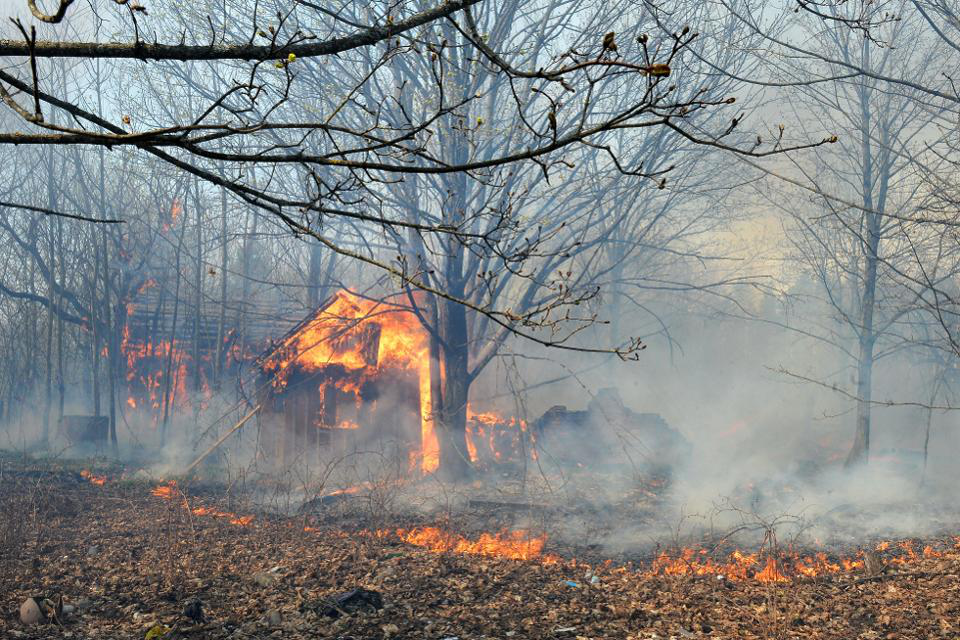

In [ ]:
img

In [ ]:
x = np.expand_dims(x,axis = 0)
pred = model.predict(x_train)
pred
                  

14/14 [==============================] - 14s 1s/step


array([[9.95874524e-01, 4.11765883e-03, 2.64193318e-06, ...,
        1.01468558e-08, 8.10371660e-07, 1.78320347e-09],
       [2.35022716e-02, 9.76497710e-01, 7.58187957e-10, ...,
        3.20450399e-13, 2.75724954e-09, 5.49959600e-13],
       [2.78093474e-04, 9.99708295e-01, 3.36424904e-07, ...,
        1.82793229e-08, 2.11303018e-06, 1.96754527e-07],
       ...,
       [4.34201844e-02, 9.56482053e-01, 8.03774583e-06, ...,
        2.01141205e-07, 1.88154136e-05, 4.23557566e-07],
       [1.00000000e+00, 5.60562121e-08, 1.03529885e-09, ...,
        1.41104474e-14, 8.78954687e-11, 3.50793401e-16],
       [1.70290112e-01, 8.28790724e-01, 8.63535242e-05, ...,
        3.82992130e-06, 1.18097931e-04, 4.82560336e-06]], dtype=float32)

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Data Collection/testing/Forest without fire/0.48007200_1530881924_final_forest.jpg')
x = image.img_to_array(img)
res = cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)



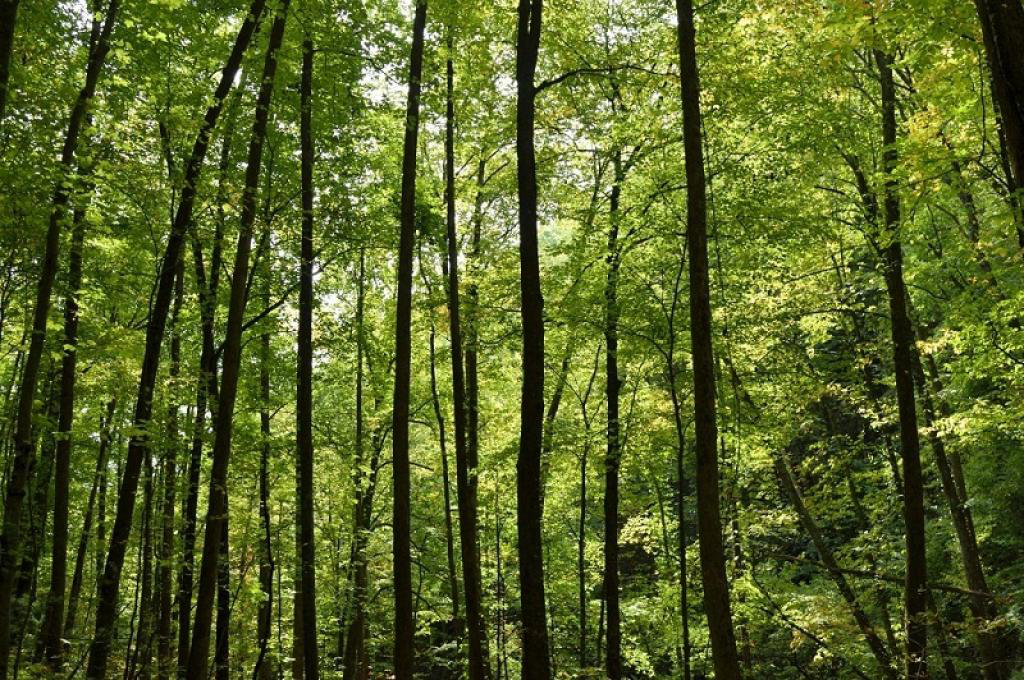

In [ ]:
img

In [ ]:
pred

array([[9.95874524e-01, 4.11765883e-03, 2.64193318e-06, ...,
        1.01468558e-08, 8.10371660e-07, 1.78320347e-09],
       [2.35022716e-02, 9.76497710e-01, 7.58187957e-10, ...,
        3.20450399e-13, 2.75724954e-09, 5.49959600e-13],
       [2.78093474e-04, 9.99708295e-01, 3.36424904e-07, ...,
        1.82793229e-08, 2.11303018e-06, 1.96754527e-07],
       ...,
       [4.34201844e-02, 9.56482053e-01, 8.03774583e-06, ...,
        2.01141205e-07, 1.88154136e-05, 4.23557566e-07],
       [1.00000000e+00, 5.60562121e-08, 1.03529885e-09, ...,
        1.41104474e-14, 8.78954687e-11, 3.50793401e-16],
       [1.70290112e-01, 8.28790724e-01, 8.63535242e-05, ...,
        3.82992130e-06, 1.18097931e-04, 4.82560336e-06]], dtype=float32)

In [ ]:
!pip install twilio
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 23.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=9d6b2528e31cbf885c2fe40b5c305bcb19e0b951be6ea03da88dada0e0be703f
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
# import opencv library
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [ ]:
# load the saved model
model = load_model(r'forestfire13.h5')
# define video
video = cv2.VideoCapture(0)
# define the featues
name = ['forest','with fire']